In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of Fundings

In [ ]:
Check the trend of investments over the years. To check the trend, find -Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to handle that.

Output Format :
year1 TotalFunding1
year2 TotalFunding2

/015 1
2015 935
2016 993
2017 687
2018 310
2019 111
2020 7


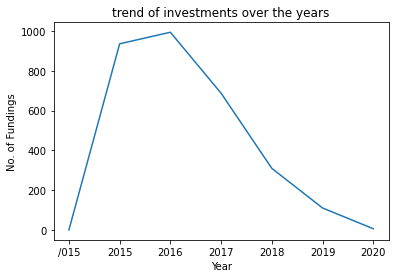

In [61]:
df = pd.read_csv('startup_funding.csv')

date_arr = np.array(df['Date dd/mm/yyyy']) # convert to date array

year_list = [
    i[-4:]
    for i in date_arr
] # To extract only years
    
year_dict = {} # To find how many funding each year happened
for i in year_list:
    if i in year_dict:
        year_dict[i] += 1
    else:
        year_dict[i] = 1
        
sorted_dict = dict(sorted(year_dict.items())) # To sort the dictionary based on keys

# Creating year and no_of_funding list to plot the graph
year = []
no_of_funding = []
for k,v in sorted_dict.items():
    year.append(k)
    no_of_funding.append(v)
    print(k,v)
    
plt.plot(year,no_of_funding)
plt.title('trend of investments over the years')
plt.xlabel('Year')
plt.ylabel('No. of Fundings')
plt.show()

# Top Indian Cities

In [ ]:
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. 
Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also.
Indian city name is first.

Print the city in descending order with respect to the number of startups.

Output Format :
city1 number1
city2 number2

Bangalore 707
Mumbai 572
New Delhi 459
Gurgaon 288
Bengaluru 141
Pune 112
Hyderabad 100
Chennai 98
Noida 93
Gurugram 50


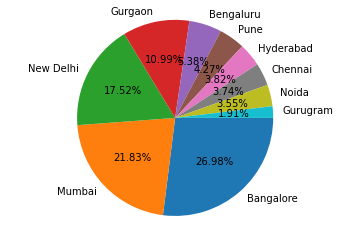

In [111]:
df = pd.read_csv('startup_funding.csv')
df['City  Location'].replace("Delhi","New Delhi",inplace = True)
df['City  Location'].replace("bangalore","Bangalore",inplace = True)

df.dropna(subset='City  Location',inplace=True)

cities_list = np.array(df['City  Location'])

cities_dict = {} 
for i in cities_list:
    x = i.split('/')[0].strip()
    if x in cities_dict:
        cities_dict[x] += 1
    else:
        cities_dict[x] = 1 
       
sorted_dict = dict(sorted(cities_dict.items(),key=lambda x:x[1],reverse=True))

cities = []
no_of_start_ups = []
count = 1
for k,v in sorted_dict.items():
    cities.append(k)
    no_of_start_ups.append(v)
    print(k,v)
    
    if count == 10:
        break
    count += 1


plt.pie(no_of_start_ups,labels=cities,autopct='%.2f%%',counterclock=False)
plt.axis('equal')
plt.show()

# Funding amount

In [ ]:
Problem Statement :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got 
(among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.

Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. 
Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. 
Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Output Format :
city1 percent1
city2 percent2
city3 percent3
. . . 

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


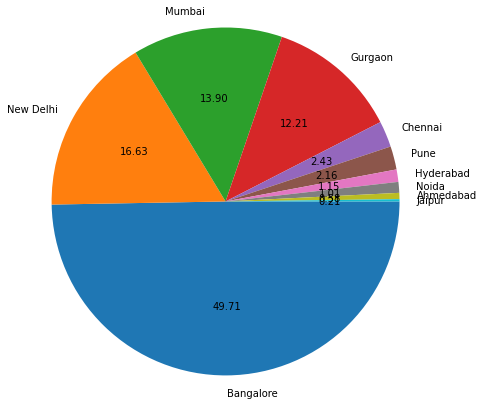

In [214]:
df = pd.read_csv('startup_funding_funding_amount.csv')
df.dropna(subset=["CityLocation"],inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

# This will convert ',' to '' then convert to float
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",",''))) 

df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]

city = df.index
amount = df.values

percent = np.true_divide(amount,amount.sum())*100

for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))
    
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,radius=2)
plt.show()

# Investment Type

In [ ]:
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 

Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . . 

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


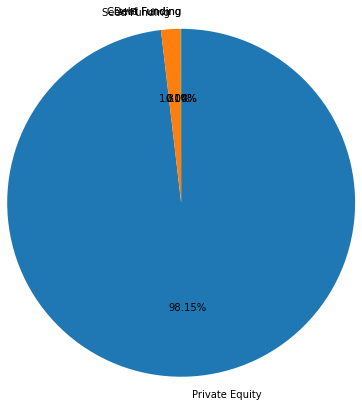

In [194]:
df = pd.read_csv('startup_funding_funding_amount.csv')

# df['InvestmentType'] = df['InvestmentType'].replace(['Crowd funding','PrivateEquity','SeedFunding'],
#                                                                    ['Crowd Funding','Private Equity','Seed Funding'])
df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace = True)
df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace = True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",",''))) 

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df.sort_values(ascending=False,inplace=True)

investment_type = df.index
amount = df.values
percent = np.true_divide(amount,sum(amount))*100

for i in range(len(investment_type)):
    print(investment_type[i],format(percent[i],'0.2f'))    
    
plt.pie(num_of_investment,labels=investment_type,autopct='%.2f%%',startangle=90,counterclock=False,radius=2)
plt.show()

# Top Industries

In [ ]:
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Output Format :
industry1 percent1
industry2 percent2
industry3 percent3
. . . 

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


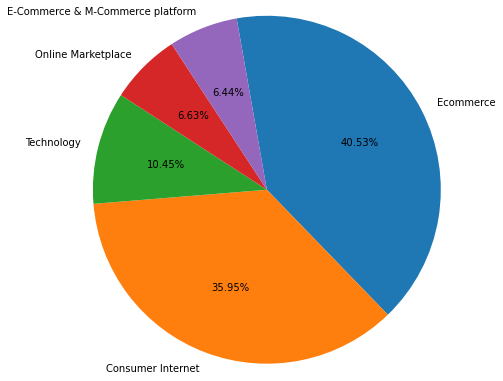

In [7]:
df = pd.read_csv('startup_funding_top_industries.csv')

df['IndustryVertical'].replace(['ECommerce','eCommerce','ecommerce'],['Ecommerce','Ecommerce','Ecommerce'],inplace = True)

# df['AmountInUSD'].dropna(inplace=True)
# df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','')
# df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]

industry = df.index
amount = df.values
percent = np.true_divide(amount,amount.sum())*100

for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))
    
plt.pie(amount,labels = industry,autopct='%.2f%%',counterclock=False,startangle=100,radius=2)
plt.show()

# Top startups

In [ ]:
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. 
There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1
startup2
startup3

Paytm
Flipkart
Ola
Snapdeal
Oyo


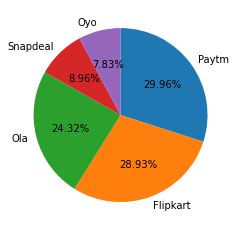

In [24]:
df = pd.read_csv('startup_funding_top_startups.csv')

df['StartupName'] = df['StartupName'].replace(['Flipkart.com','Ola Cabs','Olacabs','Oyo Rooms','Oyorooms','OyoRooms','Paytm Marketplace'],['Flipkart','Ola','Ola','Oyo','Oyo','Oyo','Paytm'])
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]

startups = df.index
amount = df.values

for i in range(len(startups)):
    print(startups[i])
    
plt.pie(amount,labels=startups,autopct='%.2f%%',startangle=90,counterclock=False)
plt.show()

# Funding rounds

In [ ]:
Find the top 5 startups who received the most number of funding rounds. 
That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. 
There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1 number1
startup2 number2
startup3 number3

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


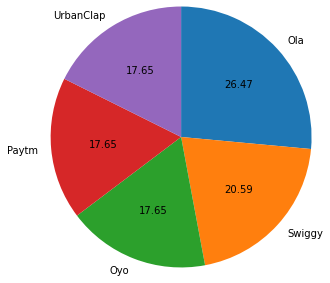

In [22]:
df = pd.read_csv('startup_funding_top_industries.csv')

df['StartupName'] = df['StartupName'].replace(['Flipkart.com','Ola Cabs','Olacabs','Oyo Rooms','Oyorooms','OyoRooms','Paytm Marketplace','OYO Rooms'],['Flipkart','Ola','Ola','Oyo','Oyo','Oyo','Paytm','Oyo'])

df = df.groupby(by='StartupName').size()
df = df.nlargest(5)

startups = df.index
number = df.values

for i in range(len(startups)):
    print(startups[i],number[i])
    
plt.pie(number,labels=startups,autopct='%0.2f',counterclock=False,startangle=90,radius=1.5)
plt.show()

# Top Investor

In [ ]:
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.

Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.

Output Format :
investorname number

In [8]:
df = pd.read_csv('startup_funding_top_startups.csv')

df['InvestorsName'].fillna("",inplace = True)
investors = df['InvestorsName']

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())

dict_investors = {}
for i in investors_name:
    dict_investors[i] = dict_investors.get(i,0) + 1
    
    
max_number = 0
for k,v in dict_investors.items():
    if v>max_number:
        max_number=v
        inves = k
        
print(inves,max_number)

Sequoia Capital 64
